# Regression Exercise: Predicting House Price

In [5]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import pydotplus
import graphviz
from sklearn.linear_model import LinearRegression

no display found. Using non-interactive Agg backend


In [6]:
path = '/Users/acast/Dropbox/Baruch/Teaching/Spring 2020/dmba-datasets/dmba/'
os.chdir(path)

In [7]:
housing_df = pd.read_csv('WestRoxbury.csv')

In [8]:
housing_df.shape

(5802, 14)

In [9]:
# Data loading and preprocessing
housing_df = pd.read_csv('WestRoxbury.csv')
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)

In [10]:
housing_df.head()

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,0,0
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,0,1
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,0,0
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,0,0
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,0,0


In [11]:
excludeColumns = ('TOTAL_VALUE', 'TAX')
predictors = [s for s in housing_df.columns if s not in excludeColumns]
outcome = 'TOTAL_VALUE'

# partition data
X = housing_df[predictors]
y = housing_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# evaluate performance
# training
regressionSummary(train_y, model.predict(train_X))
# validation
regressionSummary(valid_y, model.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 43.0306
            Mean Absolute Error (MAE) : 32.6042
          Mean Percentage Error (MPE) : -1.1116
Mean Absolute Percentage Error (MAPE) : 8.4886

Regression statistics

                      Mean Error (ME) : -0.1463
       Root Mean Squared Error (RMSE) : 42.7292
            Mean Absolute Error (MAE) : 31.9663
          Mean Percentage Error (MPE) : -1.0884
Mean Absolute Percentage Error (MAPE) : 8.3283


In [13]:
?regressionSummary

Signature: regressionSummary(y_true, y_pred)
Docstring:
print regression performance metrics 

Input:
    y_true: actual values
    y_pred: predicted values
File:      ~/opt/anaconda3/lib/python3.7/site-packages/dmba/metric.py
Type:      function


# Classification Exercise: Predicting Acceptance of a Loan

In [14]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [15]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score

In [16]:
path = '/Users/acast/Dropbox/Baruch/Teaching/Spring 2020/dmba-datasets/dmba/'
os.chdir(path)

### Universal bank dataset


For this lab, we will use the Universal bank dataset. You will use different classification methods to predict whether a customer accepts their personal loan. There are a total of 5,000 customers in the data set and 14 variables. The variables are self-explanatory.

In [17]:
## Excerpt of the dataset
bank_df = pd.read_csv('UniversalBank.csv')
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# Decision Trees

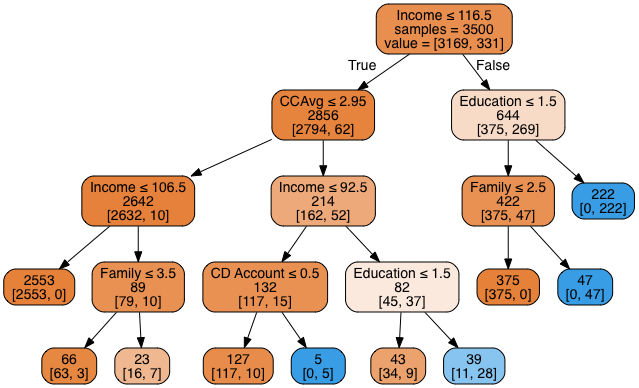

In [34]:
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

DecisionTree = DecisionTreeClassifier(max_depth = 4)
DecisionTree.fit(train_X, train_y)

plotDecisionTree(DecisionTree, feature_names=train_X.columns)

In [35]:
bank_df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [37]:
from sklearn.metrics import accuracy_score
# Get the prediction for both train and test
prediction_train = DecisionTree.predict(train_X)
prediction_valid = DecisionTree.predict(valid_X)

# Measure the accuracy of the model for both train and test sets
print("Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,prediction_valid))

Accuracy on train is: 0.9885714285714285
Accuracy on test is: 0.9813333333333333


# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()

intercept  -12.408019265585743
            Age  Experience    Income    Family     CCAvg  Education  \
coeff -0.049417    0.054529  0.053558  0.730243  0.172892   1.738225   

       Mortgage  Securities Account  CD Account    Online  CreditCard  
coeff  0.000787            -1.19696    3.871669 -0.636915   -1.181218  



In [42]:
prediction_train = logit_reg.predict(train_X)
prediction_valid = logit_reg.predict(valid_X)
print("Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,prediction_valid))

Accuracy on train is: 0.9531428571428572
Accuracy on test is: 0.9473333333333334


# Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# run naive Bayes
nb = GaussianNB()
nb.fit(train_X, train_y)

# predict probabilities
prediction_train = nb.predict_proba(train_X)
prediction_valid = nb.predict_proba(valid_X)

In [47]:
# predict class membership
prediction_train = nb.predict(train_X)
prediction_valid = nb.predict(valid_X)

print("Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y,prediction_valid))

Accuracy on train is: 0.89
Accuracy on test is: 0.8746666666666667


# Evaluation metrics

In [48]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

In [50]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

y_pred, y_pred_prob = get_predictions(GaussianNB(), train_X, train_y, valid_X)
print_scores(valid_y,y_pred,y_pred_prob)

train-set confusion matrix:
 [[2919  250]
 [ 135  196]]
test-set confusion matrix:
 [[1228  123]
 [  65   84]]
recall score:  0.5637583892617449
precision score:  0.4057971014492754
f1 score:  0.4719101123595506
accuracy score:  0.8746666666666667
ROC AUC: 0.9151809000541482


https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [52]:
NB_varimportance_0 = pd.DataFrame({'attribute': train_X.columns, 'importance': nb.theta_[0]})
NB_varimportance_0.sort_values('importance', ascending = False)

,attribute,importance
2,Income,66.107289
6,Mortgage,51.449353
0,Age,45.523193
1,Experience,20.287157
3,Family,2.369517
5,Education,1.851373
4,CCAvg,1.715762
9,Online,0.588514
10,CreditCard,0.296308
7,Securities Account,0.102872


In [54]:
NB_varimportance_0 = pd.DataFrame({'attribute': train_X.columns, 'importance': nb.theta_[1]})
NB_varimportance_0.sort_values('importance', ascending = False)

,attribute,importance
2,Income,145.758308
6,Mortgage,100.148036
0,Age,44.595166
1,Experience,19.386707
4,CCAvg,4.026647
3,Family,2.640483
5,Education,2.220544
9,Online,0.616314
8,CD Account,0.311178
10,CreditCard,0.308157
